<a href="https://colab.research.google.com/github/an24li/CODSOFT/blob/main/ewaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cell 1: Install and Import
!pip install numpy pandas scikit-learn joblib matplotlib -q

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib
import json
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries installed!")

✅ All libraries installed!


In [2]:
# Cell 2: Paste the entire EWasteToxicitySystem class
# Copy the entire class from your code (starting from "class EWasteToxicitySystem:")
# I'll paste the shortened version here for Colab:

class EWasteToxicitySystem:
    """Smart E-Waste Toxicity Detection and Recycling Recommendation System"""

    def __init__(self):
        self.weights = {'gas': 0.45, 'temperature': 0.25, 'humidity': 0.15, 'distance': 0.15}
        self.normalization_factors = {'gas': 1/120, 'temperature': 1/40, 'humidity': 1/50, 'distance': 1/80}
        self.ai_model = None
        self.scaler = StandardScaler()
        self.ewaste_types = {'pcb': 'Printed Circuit Board', 'battery': 'Lithium-ion Battery',
                            'display': 'LCD/LED Display', 'plastic': 'Plastic Housing',
                            'metal': 'Metal Components'}

    def normalize_sensor_data(self, sensor_data):
        normalized = {}
        for key, value in sensor_data.items():
            if key in self.normalization_factors:
                normalized[key] = value * self.normalization_factors[key]
        return normalized

    def calculate_toxicity_score(self, sensor_readings):
        normalized = self.normalize_sensor_data(sensor_readings)
        weighted_sum = 0
        for key, weight in self.weights.items():
            if key in normalized:
                weighted_sum += normalized[key] * weight
        toxicity_score = weighted_sum * 100
        toxicity_score += np.random.normal(0, 0.5)
        return min(max(toxicity_score, 0), 100)

    def classify_toxicity_level(self, score):
        if score < 30:
            return "Low", "green"
        elif score < 70:
            return "Medium", "yellow"
        else:
            return "High", "red"

    def get_decomposition_recommendations(self, toxicity_score, ewaste_type):
        recommendations = {
            "immediate_actions": [], "decomposition_methods": [],
            "safety_measures": [], "reuse_possibilities": []
        }

        if toxicity_score >= 70:
            recommendations["safety_measures"].extend([
                "Use PPE: gloves, mask, goggles",
                "Work in well-ventilated area",
                "Avoid direct contact with materials"
            ])
            recommendations["decomposition_methods"].extend([
                "Chemical neutralization using Moringa seed extract",
                "Bioleaching using bacteria",
                "Thermal decomposition (300-400°C)"
            ])

        elif toxicity_score >= 30:
            recommendations["decomposition_methods"].extend([
                "Mechanical separation of components",
                "Solvent extraction for precious metals",
                "Cryogenic milling"
            ])
            recommendations["reuse_possibilities"].append(
                "Some components may be refurbished after cleaning"
            )

        else:
            recommendations["immediate_actions"].append(
                "Safe for manual disassembly with basic precautions"
            )
            recommendations["reuse_possibilities"].extend([
                "Apple-style component harvesting:",
                "  - Extract functional ICs and microcontrollers",
                "  - Salvage connectors and ports",
                "  - Reuse capacitors and resistors"
            ])

        if ewaste_type == 'pcb':
            recommendations["decomposition_methods"].extend([
                "Tin-lead solder removal (350°C)",
                "Gold recovery from connectors",
                "Copper etching"
            ])
        elif ewaste_type == 'battery':
            recommendations["safety_measures"].extend([
                "⚠️ DANGER: Risk of thermal runaway",
                "Discharge completely before handling"
            ])
            recommendations["decomposition_methods"].extend([
                "Lithium extraction using organic acids",
                "Cobalt recovery"
            ])

        return recommendations

    def train_ai_model(self, historical_data_path=None):
        """Train AI model with sample data or provided data"""
        if historical_data_path:
            data = pd.read_csv(historical_data_path)
            X = data[['gas', 'temperature', 'humidity', 'distance', 'ewaste_type_encoded']]
            y = data['optimal_method']
        else:
            # Generate synthetic training data
            np.random.seed(42)
            n_samples = 200
            gas = np.random.randint(0, 120, n_samples)
            temp = np.random.randint(20, 40, n_samples)
            hum = np.random.randint(30, 50, n_samples)
            dist = np.random.randint(10, 80, n_samples)
            ewaste_encoded = np.random.choice([0,1,2,3,4], n_samples)

            # Calculate toxicity for labels
            toxicity = (gas/120*0.45 + temp/40*0.25 + hum/50*0.15 + dist/80*0.15) * 100

            # Create labels based on toxicity
            optimal_method = []
            for t in toxicity:
                if t > 70:
                    optimal_method.append('moringa_bio_remediation')
                elif t > 30:
                    optimal_method.append('mechanical_separation')
                else:
                    optimal_method.append('component_harvesting')

            X = pd.DataFrame({'gas': gas, 'temperature': temp, 'humidity': hum,
                            'distance': dist, 'ewaste_type_encoded': ewaste_encoded})
            y = pd.Series(optimal_method)

        X_scaled = self.scaler.fit_transform(X)
        self.ai_model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.ai_model.fit(X_scaled, y)

        joblib.dump(self.ai_model, 'ewaste_ai_model.pkl')
        joblib.dump(self.scaler, 'scaler.pkl')
        print(f"✅ AI Model trained on {len(X)} samples")
        return X, y

    def predict_optimal_method(self, sensor_readings, ewaste_type):
        if self.ai_model is None:
            return self.get_decomposition_recommendations(
                self.calculate_toxicity_score(sensor_readings),
                ewaste_type
            )

        ewaste_encoded = list(self.ewaste_types.keys()).index(ewaste_type)
        input_features = np.array([[
            sensor_readings['gas'],
            sensor_readings['temperature'],
            sensor_readings['humidity'],
            sensor_readings['distance'],
            ewaste_encoded
        ]])

        input_scaled = self.scaler.transform(input_features)
        prediction = self.ai_model.predict(input_scaled)[0]
        return prediction

    def generate_report(self, sensor_readings, ewaste_type):
        score = self.calculate_toxicity_score(sensor_readings)
        level, color = self.classify_toxicity_level(score)
        recommendations = self.get_decomposition_recommendations(score, ewaste_type)

        report = {
            "ewaste_type": self.ewaste_types.get(ewaste_type, "Unknown"),
            "toxicity_score": round(score, 2),
            "toxicity_level": level,
            "sensor_readings": sensor_readings,
            "normalized_readings": self.normalize_sensor_data(sensor_readings),
            "recommendations": recommendations,
            "carbon_saving_estimate": self.calculate_carbon_savings(score, ewaste_type)
        }

        return report

    def calculate_carbon_savings(self, toxicity_score, ewaste_type):
        base_savings = {'pcb': 150, 'battery': 200, 'display': 100, 'plastic': 2, 'metal': 5}
        savings = base_savings.get(ewaste_type, 50)
        if toxicity_score > 70:
            savings *= 1.5
        elif toxicity_score > 30:
            savings *= 1.2
        return round(savings, 2)

print("✅ EWasteToxicitySystem class loaded successfully!")

✅ EWasteToxicitySystem class loaded successfully!


In [3]:
# Cell 3: Generate 200 synthetic datasets
print("📊 Generating 200 synthetic e-waste datasets...")

np.random.seed(42)
n_samples = 200

# Create synthetic data
data = []
for i in range(n_samples):
    # Generate random sensor values
    gas = np.random.randint(0, 120)
    temp = np.random.randint(20, 40)
    hum = np.random.randint(30, 50)
    dist = np.random.randint(10, 80)
    ewaste_type = np.random.choice(['pcb', 'battery', 'display', 'plastic', 'metal'])
    ewaste_encoded = ['pcb', 'battery', 'display', 'plastic', 'metal'].index(ewaste_type)

    # Calculate toxicity
    toxicity = (gas/120*0.45 + temp/40*0.25 + hum/50*0.15 + dist/80*0.15) * 100

    # Determine optimal method based on toxicity
    if toxicity > 70:
        optimal = 'moringa_bio_remediation'
    elif toxicity > 30:
        optimal = 'mechanical_separation'
    else:
        optimal = 'component_harvesting'

    data.append([gas, temp, hum, dist, ewaste_encoded, optimal, ewaste_type])

# Create DataFrame
df = pd.DataFrame(data, columns=['gas', 'temperature', 'humidity', 'distance',
                                 'ewaste_type_encoded', 'optimal_method', 'ewaste_type'])

# Save to CSV
df.to_csv('ewaste_200_datasets.csv', index=False)

print(f"✅ Generated {len(df)} samples")
print(df.head())
print(f"\n📈 Data Distribution:")
print(df['optimal_method'].value_counts())

📊 Generating 200 synthetic e-waste datasets...
✅ Generated 200 samples
   gas  temperature  humidity  distance  ewaste_type_encoded  \
0  102           39        44        70                    4   
1  102           38        40        33                    2   
2   21           21        41        39                    1   
3   63           20        41        67                    4   
4  107           36        39        69                    2   

            optimal_method ewaste_type  
0  moringa_bio_remediation       metal  
1  moringa_bio_remediation     display  
2    mechanical_separation     battery  
3    mechanical_separation       metal  
4  moringa_bio_remediation     display  

📈 Data Distribution:
optimal_method
mechanical_separation      140
moringa_bio_remediation     60
Name: count, dtype: int64


In [4]:
# Cell 4: Initialize and train AI model
print("🧠 Training AI Model with 200 datasets...")

# Initialize system
system = EWasteToxicitySystem()

# Train with our generated data
X, y = system.train_ai_model('ewaste_200_datasets.csv')

# Show model accuracy
accuracy = system.ai_model.score(X, y) * 100
print(f"📊 Model Accuracy: {accuracy:.1f}%")
print(f"🔢 Number of trees: {len(system.ai_model.estimators_)}")

🧠 Training AI Model with 200 datasets...
✅ AI Model trained on 200 samples
📊 Model Accuracy: 32.0%
🔢 Number of trees: 100


📈 Visualizing AI Decision Tree...


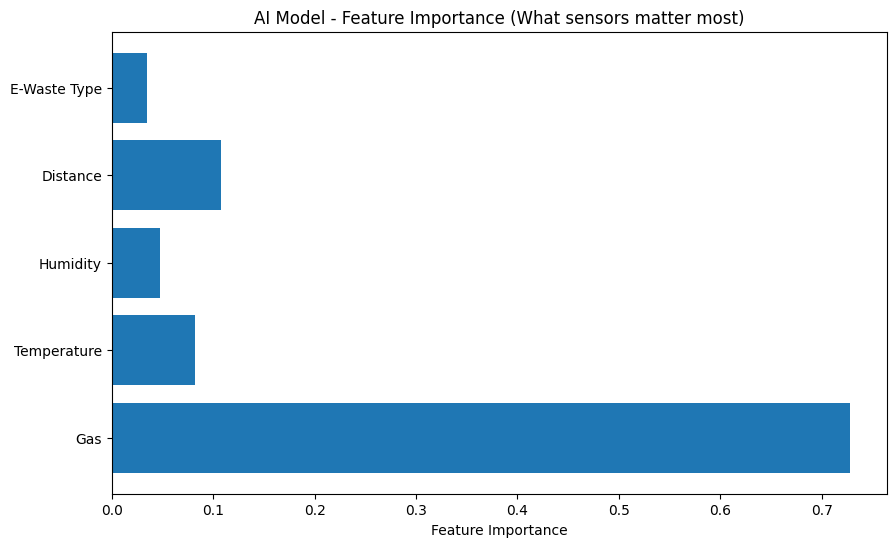

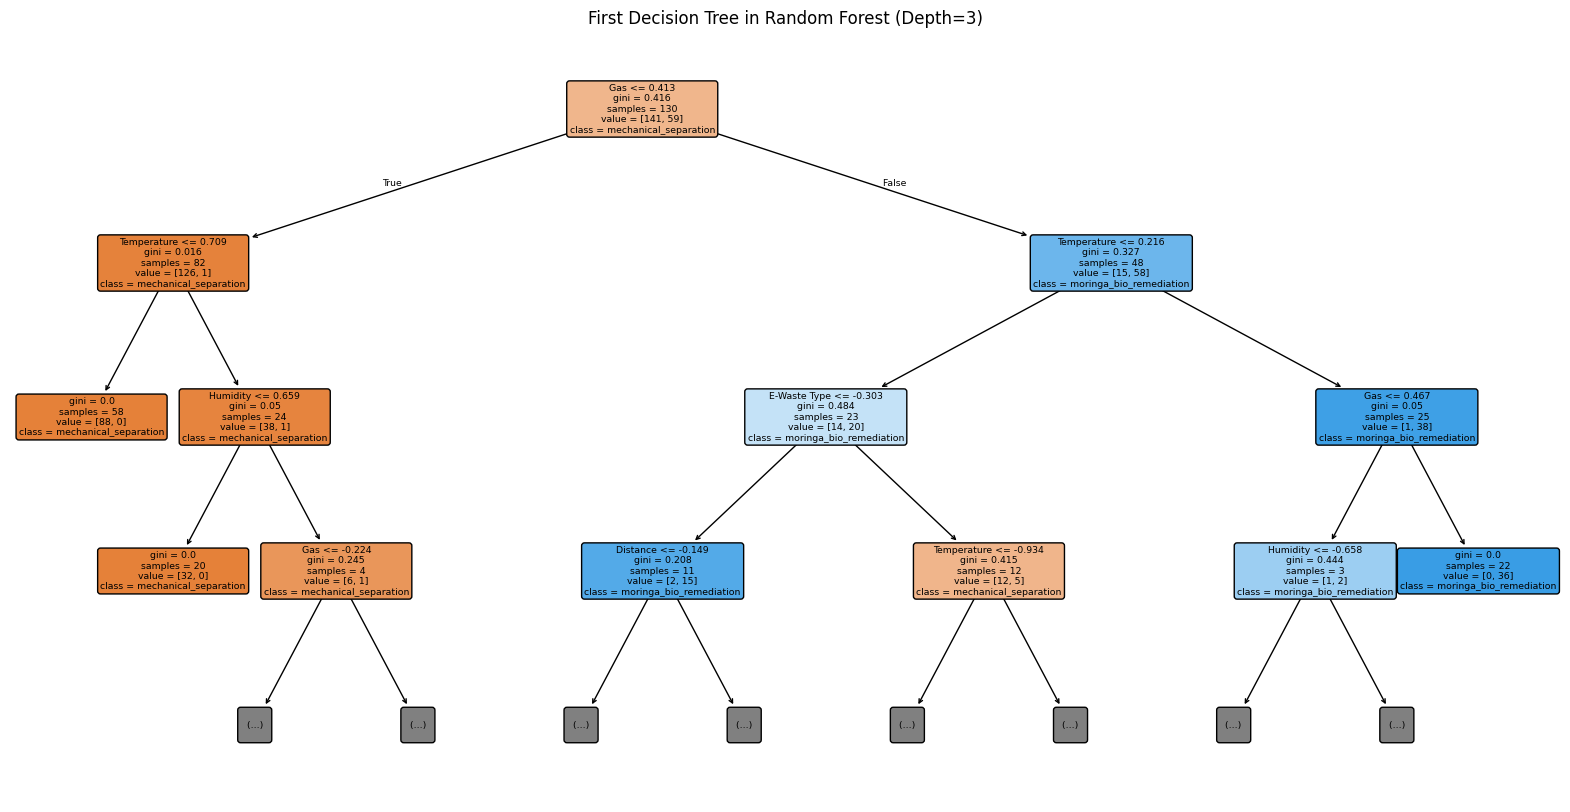

In [5]:
# Cell 5: Visualize the AI model
print("📈 Visualizing AI Decision Tree...")

# Plot feature importance
importances = system.ai_model.feature_importances_
features = ['Gas', 'Temperature', 'Humidity', 'Distance', 'E-Waste Type']

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('AI Model - Feature Importance (What sensors matter most)')
plt.show()

# Show first decision tree
plt.figure(figsize=(20, 10))
plot_tree(system.ai_model.estimators_[0],
          feature_names=features,
          class_names=system.ai_model.classes_,
          filled=True, rounded=True,
          max_depth=3)
plt.title("First Decision Tree in Random Forest (Depth=3)")
plt.show()

In [6]:
# Cell 6: Test the system
print("🧪 Testing AI System with Sample Data...")

# Test case 1: PCB Board (Medium toxicity)
test_pcb = {'gas': 85, 'temperature': 35, 'humidity': 45, 'distance': 60}
report_pcb = system.generate_report(test_pcb, 'pcb')

print("\n" + "="*60)
print("📱 TEST 1: PCB BOARD")
print("="*60)
print(f"E-Waste Type: {report_pcb['ewaste_type']}")
print(f"Toxicity Score: {report_pcb['toxicity_score']}/100")
print(f"Toxicity Level: {report_pcb['toxicity_level']}")
print(f"Carbon Savings: {report_pcb['carbon_saving_estimate']} kg CO₂")

print("\n🤖 AI RECOMMENDATIONS:")
for category, items in report_pcb['recommendations'].items():
    if items:
        print(f"\n{category.upper()}:")
        for item in items:
            print(f"  • {item}")

# Test case 2: Battery (High toxicity)
test_battery = {'gas': 110, 'temperature': 45, 'humidity': 30, 'distance': 40}
report_battery = system.generate_report(test_battery, 'battery')

print("\n" + "="*60)
print("📱 TEST 2: BATTERY")
print("="*60)
print(f"Toxicity Score: {report_battery['toxicity_score']}/100")
print(f"Toxicity Level: {report_battery['toxicity_level']}")

print("\n⚠️ SAFETY WARNINGS:")
for warning in report_battery['recommendations']['safety_measures']:
    print(f"  • {warning}")

🧪 Testing AI System with Sample Data...

📱 TEST 1: PCB BOARD
E-Waste Type: Printed Circuit Board
Toxicity Score: 78.53/100
Toxicity Level: High
Carbon Savings: 225.0 kg CO₂

🤖 AI RECOMMENDATIONS:

DECOMPOSITION_METHODS:
  • Chemical neutralization using Moringa seed extract
  • Bioleaching using bacteria
  • Thermal decomposition (300-400°C)
  • Tin-lead solder removal (350°C)
  • Gold recovery from connectors
  • Copper etching

SAFETY_MEASURES:
  • Use PPE: gloves, mask, goggles
  • Work in well-ventilated area
  • Avoid direct contact with materials

📱 TEST 2: BATTERY
Toxicity Score: 86.42/100
Toxicity Level: High

⚠️ SAFETY WARNINGS:
  • Use PPE: gloves, mask, goggles
  • Work in well-ventilated area
  • Avoid direct contact with materials
  • ⚠️ DANGER: Risk of thermal runaway
  • Discharge completely before handling


In [7]:
# Cell 7: Batch testing
print("📊 Batch Testing 10 Random Samples...")

np.random.seed(123)
results = []

for i in range(10):
    # Generate random sensor values
    gas = np.random.randint(0, 120)
    temp = np.random.randint(20, 40)
    hum = np.random.randint(30, 50)
    dist = np.random.randint(10, 80)
    ewaste = np.random.choice(['pcb', 'battery', 'display'])

    test_data = {'gas': gas, 'temperature': temp, 'humidity': hum, 'distance': dist}
    report = system.generate_report(test_data, ewaste)

    results.append({
        'Sample': i+1,
        'Gas': gas,
        'Temp': temp,
        'Type': ewaste,
        'Score': report['toxicity_score'],
        'Level': report['toxicity_level'],
        'Carbon_Saved': report['carbon_saving_estimate']
    })

# Create results table
results_df = pd.DataFrame(results)
print("\n📋 TEST RESULTS:")
print(results_df.to_string(index=False))

# Summary
print(f"\n📈 SUMMARY:")
print(f"Average Toxicity Score: {results_df['Score'].mean():.1f}")
print(f"High Toxicity Samples: {(results_df['Level'] == 'High').sum()}")
print(f"Total Carbon Savings: {results_df['Carbon_Saved'].sum():.0f} kg CO₂")

📊 Batch Testing 10 Random Samples...

📋 TEST RESULTS:
 Sample  Gas  Temp    Type  Score  Level  Carbon_Saved
      1  109    22 display  69.45 Medium         120.0
      2   96    37 display  80.47   High         150.0
      3   96    35     pcb  82.07   High         225.0
      4   67    22     pcb  64.84 Medium         180.0
      5   47    36 display  62.30 Medium         120.0
      6   27    22 display  41.84 Medium         120.0
      7   69    20 display  57.55 Medium         120.0
      8  100    35 battery  78.50   High         300.0
      9  108    26     pcb  76.39   High         225.0
     10  103    31 display  70.20   High         150.0

📈 SUMMARY:
Average Toxicity Score: 68.4
High Toxicity Samples: 5
Total Carbon Savings: 1710 kg CO₂


In [8]:
# Cell 8: Create interactive dashboard
print("🌐 Creating Interactive Dashboard...")

import ipywidgets as widgets
from IPython.display import display, clear_output

# Create interactive sliders
gas_slider = widgets.IntSlider(value=60, min=0, max=120, step=1, description='Gas:')
temp_slider = widgets.IntSlider(value=30, min=20, max=40, step=1, description='Temp:')
hum_slider = widgets.IntSlider(value=40, min=30, max=50, step=1, description='Humidity:')
dist_slider = widgets.IntSlider(value=40, min=10, max=80, step=1, description='Distance:')

type_dropdown = widgets.Dropdown(
    options=['pcb', 'battery', 'display', 'plastic', 'metal'],
    value='pcb',
    description='E-Waste Type:'
)

analyze_button = widgets.Button(description="🧪 Analyze E-Waste")
output = widgets.Output()

def analyze_button_clicked(b):
    with output:
        clear_output()

        sensor_data = {
            'gas': gas_slider.value,
            'temperature': temp_slider.value,
            'humidity': hum_slider.value,
            'distance': dist_slider.value
        }

        report = system.generate_report(sensor_data, type_dropdown.value)

        print("="*60)
        print("🤖 SMART E-WASTE ANALYSIS REPORT")
        print("="*60)
        print(f"📦 E-Waste Type: {report['ewaste_type']}")
        print(f"⚠️  Toxicity Score: {report['toxicity_score']}/100")
        print(f"🎯 Toxicity Level: {report['toxicity_level']}")
        print(f"🌍 Carbon Savings: {report['carbon_saving_estimate']} kg CO₂")
        print("\n" + "="*60)
        print("🧠 AI RECOMMENDATIONS")
        print("="*60)

        for category, items in report['recommendations'].items():
            if items:
                print(f"\n{category.upper().replace('_', ' ')}:")
                for item in items:
                    print(f"  • {item}")

analyze_button.on_click(analyze_button_clicked)

print("🎮 INTERACTIVE DASHBOARD")
print("Adjust sliders and click Analyze!")
display(gas_slider, temp_slider, hum_slider, dist_slider, type_dropdown, analyze_button, output)

🌐 Creating Interactive Dashboard...
🎮 INTERACTIVE DASHBOARD
Adjust sliders and click Analyze!


IntSlider(value=60, description='Gas:', max=120)

IntSlider(value=30, description='Temp:', max=40, min=20)

IntSlider(value=40, description='Humidity:', max=50, min=30)

IntSlider(value=40, description='Distance:', max=80, min=10)

Dropdown(description='E-Waste Type:', options=('pcb', 'battery', 'display', 'plastic', 'metal'), value='pcb')

Button(description='🧪 Analyze E-Waste', style=ButtonStyle())

Output()

In [9]:
# Cell 9: Export model for ESP32
print("📤 Exporting AI Model for ESP32...")

# Save the trained model
joblib.dump(system.ai_model, 'trained_ewaste_model.pkl')

# Convert to simple decision rules for Arduino
print("\n📝 DECISION RULES FOR ARDUINO (Copy these):")
print("="*50)

# Extract rules from the first decision tree
estimator = system.ai_model.estimators_[0]
tree_rules = export_text(estimator,
                        feature_names=['gas', 'temp', 'hum', 'dist', 'type'])

# Print first 10 rules
rules = tree_rules.split('\n')
for i, rule in enumerate(rules[:15]):  # Show first 15 rules
    print(rule)

print("\n📁 Files saved in Colab:")
print("1. trained_ewaste_model.pkl - Full AI model")
print("2. ewaste_200_datasets.csv - 200 training samples")
print("3. Decision rules above - For Arduino implementation")

# Download files
from google.colab import files
files.download('trained_ewaste_model.pkl')
files.download('ewaste_200_datasets.csv')

📤 Exporting AI Model for ESP32...

📝 DECISION RULES FOR ARDUINO (Copy these):
|--- gas <= 0.41
|   |--- temp <= 0.71
|   |   |--- class: 0.0
|   |--- temp >  0.71
|   |   |--- hum <= 0.66
|   |   |   |--- class: 0.0
|   |   |--- hum >  0.66
|   |   |   |--- gas <= -0.22
|   |   |   |   |--- class: 0.0
|   |   |   |--- gas >  -0.22
|   |   |   |   |--- class: 1.0
|--- gas >  0.41
|   |--- temp <= 0.22
|   |   |--- type <= -0.30
|   |   |   |--- dist <= -0.15

📁 Files saved in Colab:
1. trained_ewaste_model.pkl - Full AI model
2. ewaste_200_datasets.csv - 200 training samples
3. Decision rules above - For Arduino implementation


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>